# 독립 표본 검정
독립 표본 검정은 서로 독립적인 두 집단(예: 남성과 여성, 두 지역의 주민 등)의 평균이나 비율이 통계적으로 유의미하게 다른지를 판단하기 위한 방법입니다. 주로 독립표본 t-검정이 사용되며, 두 집단의 평균을 비교할 때, 각 집단의 데이터가 정규분포를 따르고 분산이 동일하다는 가정을 전제로 합니다. 만약 분산이 다르다면 Welch의 t-검정(Welch's t-test)을 사용하게 됩니다.

* 정규성 검정: 각 집단의 데이터가 정규분포를 따르는지 확인합니다. 대표적으로 Shapiro-Wilk 검정을 사용합니다.
* 분산의 동질성 검정: 두 집단의 분산이 동일한지 확인합니다. Levene 검정이나 Bartlett 검정을 사용할 수 있습니다.

In [7]:
# 귀무가설: 반별 수학 평균 점수는 같다. 
# 대립가설: 반별 수학 평균 점수는 다르다.

class1 = [85, 90, 92, 88, 86, 89, 83, 87]
class2 = [80, 82, 88, 85, 84]

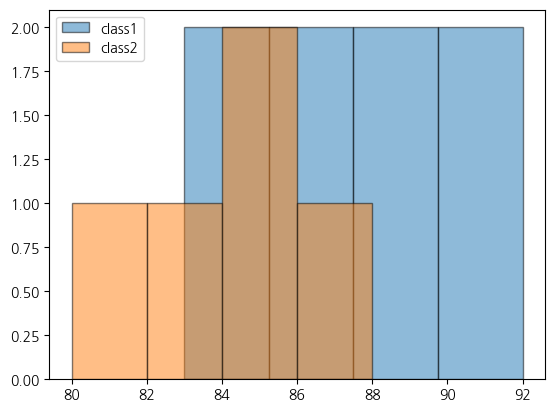

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import koreanize_matplotlib

plt.hist(class1, alpha = 0.5, bins = 'auto', edgecolor = 'black')
plt.hist(class2, alpha = 0.5, bins = 'auto', edgecolor = 'black')
plt.legend(['class1', 'class2'])
plt.show()

In [10]:
# 정규분포를 따르는지 검정
print(stats.shapiro(class1))
print(stats.shapiro(class2))

ShapiroResult(statistic=0.9981893537736595, pvalue=0.999986994137081)
ShapiroResult(statistic=0.9917398436295006, pvalue=0.9854182266624975)


In [11]:
# 분산이 동일한지 검정
stats.levene(class1, class2)

LeveneResult(statistic=0.0027925869510027727, pvalue=0.958802951766629)

In [12]:
# equal_var=True // 독립표본검정을 하겠다
# equal_var=False // 분산이 동일하지 않으면 welch t-검정
stats.ttest_ind(class1, class2, equal_var=True)

# p-value가 0.05보다 낮으니 대립가설 채택

TtestResult(statistic=2.2108140580092237, pvalue=0.04914857789252186, df=11.0)

In [13]:
# 귀무가설: 반별 수학 평균 점수는 같다.
# 대립가설: 1반이 2반보다 수학 평균 점수가 더 높다

stats.ttest_ind(class1, class2, equal_var=True, alternative='greater')

# p-value가 0.05보다 낮으니 대립가설 채택

TtestResult(statistic=2.2108140580092237, pvalue=0.02457428894626093, df=11.0)

* 만약 정규성을 하나라도 따르지 않았다면?

In [15]:
# 맨 휘트니 U 검정 : 데이터 순위를 비교해서 두 집단의 중앙값 차이
stats.mannwhitneyu(class1, class2)

# p-value가 0.05보다 크니 두 집단의 중앙값 차이가 없다

MannwhitneyuResult(statistic=33.0, pvalue=0.06652637566016166)

## 연습문제
1. 1반과 2반의 평균 점수 차이가 있는지 유의 수준 0.05 하에서 가설 검정하시오.

* 귀무가설: 반별 수학 평균 점수는 같다.
* 대립가설: 2반 수학 평균 점수가 더 높다.

In [17]:
class1 = [85, 90, 92, 88, 86, 89, 83, 87]
class2 = [80, 82, 88, 85, 84]

# 1. 정규분포를 만족하는지
print(stats.shapiro(class1))
print(stats.shapiro(class2))

# 2. 분산이 같은지
print(stats.levene(class1, class2))

# 3. 둘다 같으니 True 
stats.ttest_ind(class2, class1, equal_var=True, alternative='greater')

# p-value가 0.05보다 크니 귀무가설 채택

ShapiroResult(statistic=0.9981893537736595, pvalue=0.999986994137081)
ShapiroResult(statistic=0.9917398436295006, pvalue=0.9854182266624975)
LeveneResult(statistic=0.0027925869510027727, pvalue=0.958802951766629)


TtestResult(statistic=-2.2108140580092237, pvalue=0.9754257110537391, df=11.0)

2. 1반과 2반의 평균 점수 차이가 있는지 유의 수준 0.05 하에서 가설 검정하시오.
* 귀무가설: 반별 수학 평균 점수는 같다.
* 대립가설: 2반 수학 평균 점수가 더 높다.

In [19]:
class1 = [85, 90, 92, 88, 86, 89, 83, 87]
class2 = [80, 82, 88, 85, 130]

# 1. 정규분포를 만족하는지
print(stats.shapiro(class1))
print(stats.shapiro(class2))

stats.mannwhitneyu(class1, class2)

# p-value가 0.05보다 크니 귀무가설 채택

ShapiroResult(statistic=0.9981893537736595, pvalue=0.999986994137081)
ShapiroResult(statistic=0.6880497349322277, pvalue=0.007151570728885509)


MannwhitneyuResult(statistic=26.0, pvalue=0.4194714434612976)

3. 한 연구자가 특정 튜터링 프로그램이 학생들의 시험 성적에 미치는 영향을 조사하고자 하였습니다. 이를 위해 두 개의 독립 집단을 선정하였습니다. 두 그룹의 평균 시험 점수에 차이가 있는지 검정하시오. (유의수준 0.05)

* 그룹 A: 튜터링 프로그램에 참여한 학생들의 시험 점수
* 그룹 B: 튜터링 프로그램에 참여하지 않은 학생들의 시험 점수

ShapiroResult(statistic=0.9808738685761099, pvalue=0.9696722802646456)
ShapiroResult(statistic=0.9498823422157764, pvalue=0.6671086821934071)
LeveneResult(statistic=3.509532062391682, pvalue=0.07734786417119568)


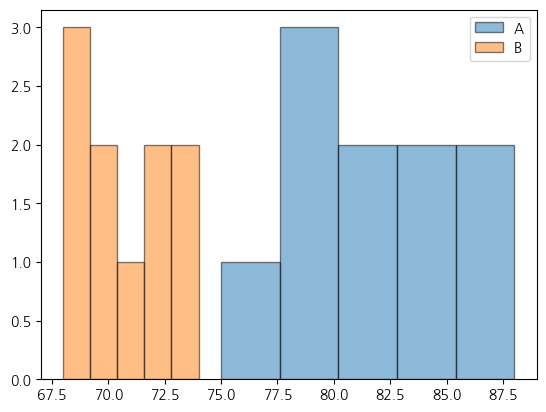

In [21]:
A = [78, 85, 82, 88, 75, 80, 79, 83, 81, 87]
B = [70, 72, 68, 74, 69, 71, 73, 70, 68, 72]

# 1. 정규분포를 만족하는지
print(stats.shapiro(A))
print(stats.shapiro(B))

# 2. 분산이 같은지
print(stats.levene(A, B))

# 3. 둘다 같으니 True 
stats.ttest_ind(A, B, equal_var = True, alternative = 'greater')

# p-value가 0.05보다 작으니 대립가설 채택 -> 차이가 있다

plt.hist(A, alpha = 0.5, bins = 'auto', edgecolor = 'black')
plt.hist(B, alpha = 0.5, bins = 'auto', edgecolor = 'black')
plt.legend(['A', 'B'])
plt.show()

3. 한 연구자가 특정 튜터링 프로그램이 학생들의 시험 성적에 미치는 영향을 조사하고자 하였습니다. 이를 위해 두 개의 독립 집단을 선정하였습니다. 두 그룹의 평균 시험 점수에 차이가 있는지 검정하시오. (유의수준 0.05)

* 그룹 A: 튜터링 프로그램에 참여한 학생들의 시험 점수
* 그룹 B: 튜터링 프로그램에 참여하지 않은 학생들의 시험 점수

In [49]:
A = [78, 85, 82, 88, 75, 80, 79, 83, 81, 87]
B = [70, 72, 68, 74, 69, 71, 73, 70, 68, 72]

# 귀무가설 : A가 B보다 같거나 작다
# 대립가설 : A가 B보다 크다

# 1
stats.shapiro(A), stats.shapiro(B)

# 2
stats.levene(A, B)

# 3
stats.ttest_ind(A, B, equal_var=True, alternative='greater')



TtestResult(statistic=7.686207367576637, pvalue=2.1561688683808457e-07, df=18.0)